STEP 1

Problem Description:

In this project we have been provided with historical sales data for 99 products across 45 outlets.Each store contains a number of departments, and we have to predict the Weekly Sales.
In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

Problem Statement:

To determine the sales in Walmart in each department during any day and how it is going to affect their sales and when by using prediction models with the given data. 

Data Wrangling: STEP 2

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
#accuracy
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#pca
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
#clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
#models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
features=pd.read_csv('/content/features.csv')
train=pd.read_csv('/content/train.csv')
stores=pd.read_csv('/content/stores.csv')
test=pd.read_csv('/content/test.csv')
sample_submission=pd.read_csv('/content/sampleSubmission.csv')


In [ ]:
features.shape

(8190, 12)

In [ ]:
test.shape

(115064, 4)

In [ ]:
train.shape

(421570, 5)

In [ ]:
stores.shape

(45, 3)

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
sample_submission.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


About the DATA:

stores.csv
This file contains anonymized information about the 45 stores, indicating the type and size of store.

train.csv
This is the historical training data, which covers to 2010–02–05 to 2012–11–01. Within this file you will find the following fields:

Store — the store number

Dept — the department number

Date — the week

Weekly_Sales — sales for the given department in the given store

IsHoliday — whether the week is a special holiday week

test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

Store — the store number

Date — the week

Temperature — average temperature in the region

Fuel_Price — cost of fuel in the region

MarkDown 1–5 — anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.

CPI — the consumer price index

Unemployment — the unemployment rate

IsHoliday — whether the week is a special holiday week

In [ ]:
#join the store and feature
fsmerge=features.merge(stores, how='inner',on='Store')
fsmerge

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [ ]:
pd.DataFrame(fsmerge.dtypes,columns=['Types'])

,Types
Store,int64
Date,object
Temperature,float64
Fuel_Price,float64
MarkDown1,float64
MarkDown2,float64
MarkDown3,float64
MarkDown4,float64
MarkDown5,float64
CPI,float64


In [ ]:
pd.DataFrame(train.dtypes,columns=['Types'])

,Types
Store,int64
Dept,int64
Date,object
Weekly_Sales,float64
IsHoliday,bool


In [ ]:
pd.DataFrame(test.dtypes,columns=['Types'])

,Types
Store,int64
Dept,int64
Date,object
IsHoliday,bool


In [ ]:
#convert datatime of date
fsmerge.Date = pd.to_datetime(fsmerge.Date)
train.Date = pd.to_datetime(train.Date)


In [ ]:
fsmerge=fsmerge.merge(train,how='left')

In [ ]:
fsmerge.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1.0,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2.0,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3.0,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4.0,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5.0,32229.38


In [ ]:
fsmerge.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Dept,Weekly_Sales
count,423325.000000,423325.000000,423325.000000,152433.000000,112532.000000,138658.000000,136466.000000,153187.000000,422740.000000,422740.000000,423325.000000,421570.000000,421570.000000
mean,22.203860,60.067140,3.361933,7246.604247,3337.597289,1449.098932,3382.019834,4618.743783,171.218863,7.957296,136701.215794,44.260317,15981.258123
std,12.786244,18.452599,0.458038,8319.906707,9461.265420,9674.705234,6306.728468,6258.233496,39.167088,1.863433,60990.977801,30.492054,22711.183519
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.000000,1.000000,-4988.940000
25%,11.000000,46.670000,2.935000,2230.800000,42.000000,5.140000,500.910000,1863.720000,132.022667,6.891000,93638.000000,18.000000,2079.650000
50%,22.000000,62.070000,3.452000,5336.520000,194.670000,24.830000,1465.540000,3340.020000,182.350989,7.866000,140167.000000,37.000000,7612.030000
75%,33.000000,74.260000,3.738000,9210.900000,1943.200000,104.500000,3592.000000,5535.130000,212.512605,8.567000,202505.000000,74.000000,20205.852500
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000,99.000000,693099.360000


In [ ]:
fsmerge.isnull().sum()

Store                0
Date                 0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday            0
Type                 0
Size                 0
Dept              1755
Weekly_Sales      1755
dtype: int64

In [ ]:
fsmerge=pd.get_dummies(fsmerge,columns=['Type'])
fsmerge[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = fsmerge[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [ ]:
fsmerge.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1          0
MarkDown2          0
MarkDown3          0
MarkDown4          0
MarkDown5          0
CPI              585
Unemployment     585
IsHoliday          0
Size               0
Dept            1755
Weekly_Sales    1755
Type_A             0
Type_B             0
Type_C             0
dtype: int64

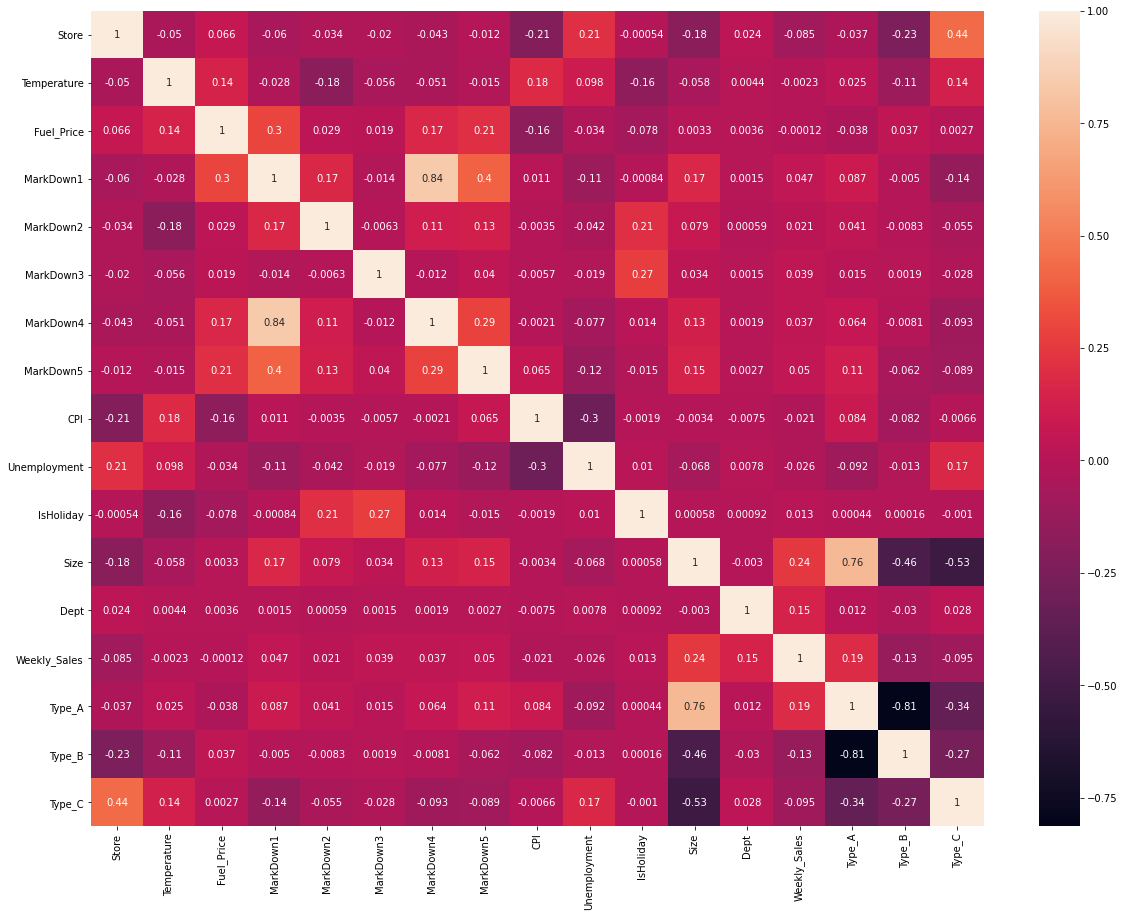

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(fsmerge.corr(),annot=True)

In [ ]:
fsmerge['month']=pd.to_datetime(fsmerge['Date']).dt.month

In [ ]:
fsmerge['Year']=pd.to_datetime(fsmerge['Date']).dt.year
fsmerge['Week']=pd.to_datetime(fsmerge['Date']).dt.week

In [ ]:
fsmerge['Dept']=fsmerge['Dept'].fillna(fsmerge['Dept'].mean())

In [ ]:
fsmerge['CPI']=fsmerge['CPI'].fillna(fsmerge['CPI'].mean())


In [ ]:
fsmerge['Weekly_Sales']=fsmerge['Weekly_Sales'].fillna(fsmerge['Weekly_Sales'].mean())

In [ ]:
fsmerge['Unemployment']

0         8.106
1         8.106
2         8.106
3         8.106
4         8.106
          ...  
423320      NaN
423321      NaN
423322      NaN
423323      NaN
423324      NaN
Name: Unemployment, Length: 423325, dtype: float64

In [ ]:

fsmerge['Unemployment']=fsmerge['Unemployment'].fillna(fsmerge['Unemployment'].mean())


In [ ]:
fsmerge[['Week','Year']]=fsmerge[['Week','Year']].fillna(0)

In [ ]:
fsmerge=fsmerge.drop(columns=['Date'])

In [ ]:
fsmerge.isnull().sum()

Store           0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Size            0
Dept            0
Weekly_Sales    0
Type_A          0
Type_B          0
Type_C          0
month           0
Year            0
Week            0
dtype: int64

STEP 3: Exploratory Data Analysis

**Compare** each  important entity with the weeklysales

In [ ]:
def scatter (fsmerge,column):
  plt.figure()
  plt.scatter(fsmerge[column],fsmerge['Weekly_Sales'])
  plt.xlabel(column)
  plt.ylabel('weeklySales')


In [ ]:
fsmerge.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Size', 'Dept', 'Weekly_Sales', 'Type_A', 'Type_B',
       'Type_C', 'month', 'Year', 'Week'],
      dtype='object')

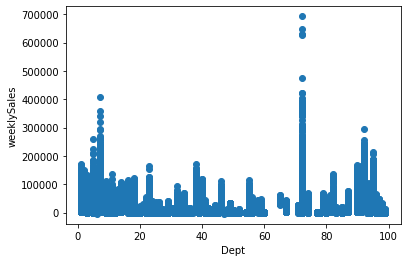

In [ ]:
scatter(fsmerge,'Dept')

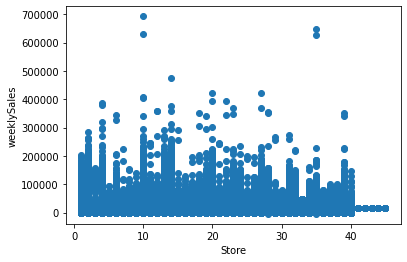

In [ ]:
scatter(fsmerge,'Store')

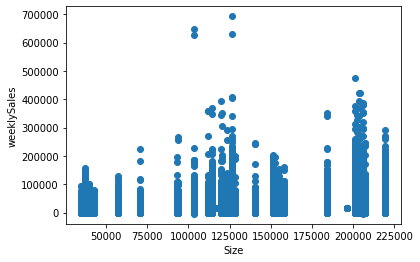

In [ ]:
scatter(fsmerge,'Size')

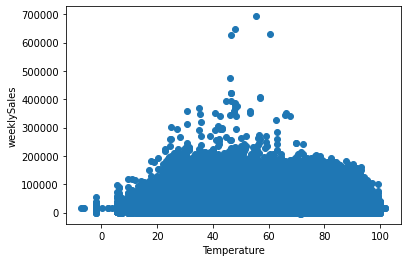

In [ ]:
scatter(fsmerge,'Temperature')

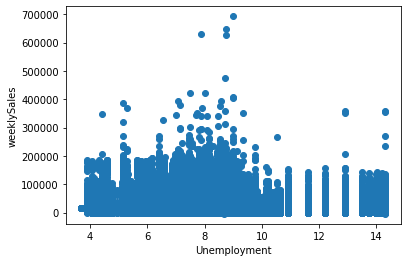

In [ ]:
scatter(fsmerge,'Unemployment')

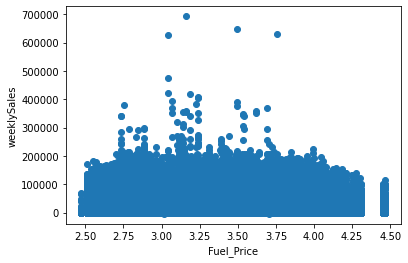

In [ ]:
scatter(fsmerge,'Fuel_Price')

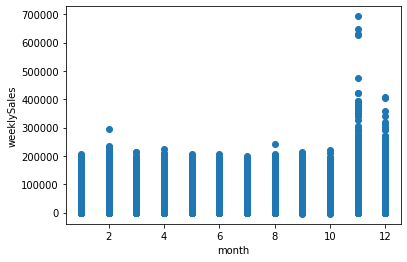

In [ ]:
scatter(fsmerge,'month')

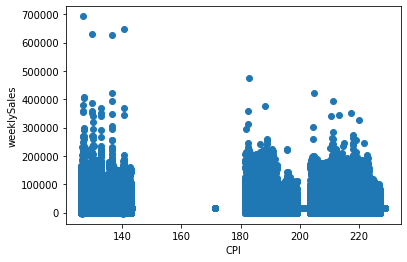

In [ ]:
scatter(fsmerge,'CPI')

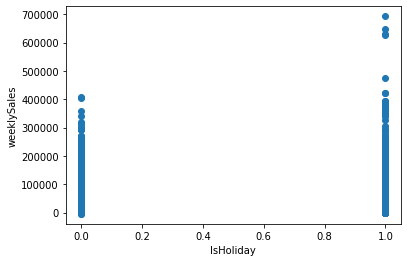

In [ ]:
scatter(fsmerge,'IsHoliday')

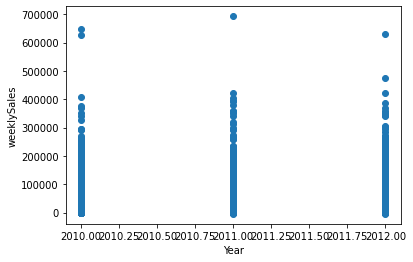

In [ ]:
scatter(fsmerge,'Year')

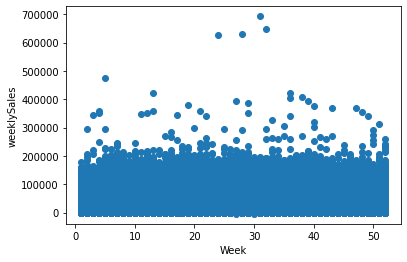

In [ ]:
scatter(fsmerge,'Week')

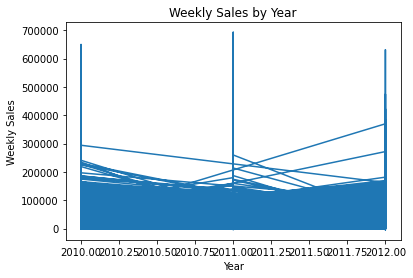

In [ ]:
x=fsmerge['Year']
y=fsmerge['Weekly_Sales']
plt.title('Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

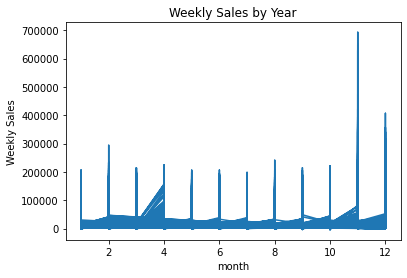

In [ ]:
x=fsmerge['month']
y=fsmerge['Weekly_Sales']
plt.title('Weekly Sales by Year')
plt.xlabel('month')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

Step 4: Data Visualization

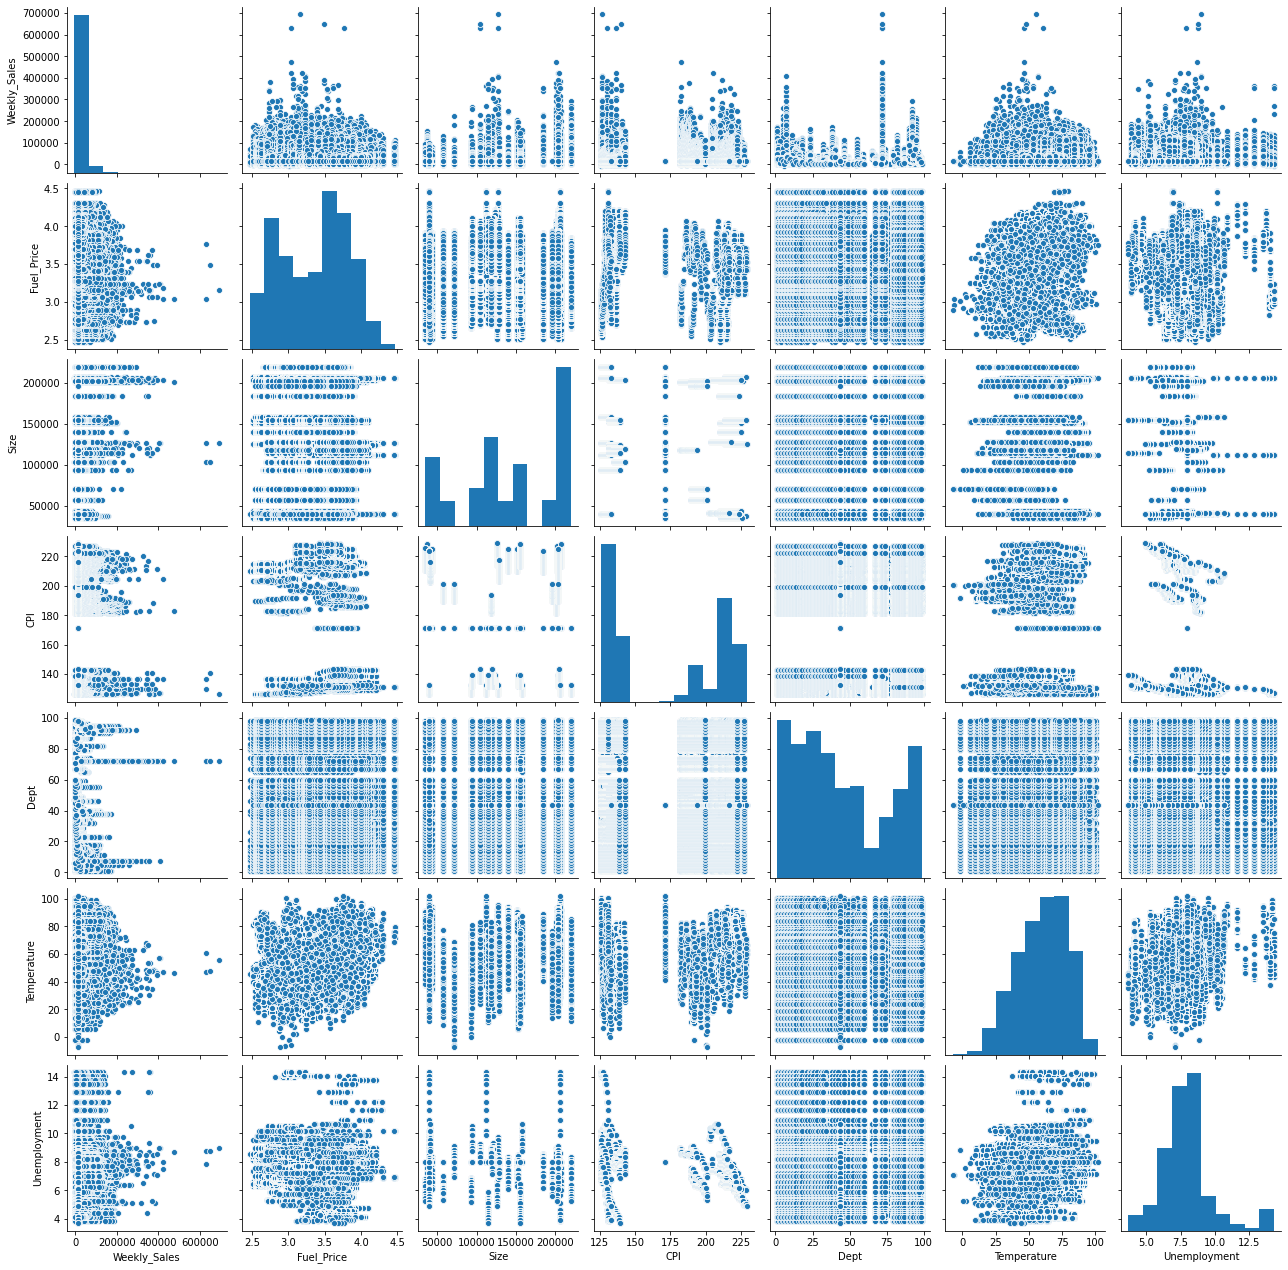

In [ ]:
sns.pairplot(fsmerge, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [ ]:
fsmerge['Dept'].value_counts()

91.0    6435
81.0    6435
10.0    6435
3.0     6435
46.0    6435
        ... 
78.0     235
77.0     150
65.0     143
39.0      16
43.0      12
Name: Dept, Length: 82, dtype: int64

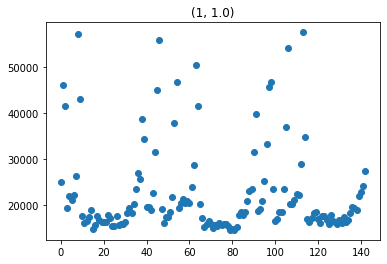

In [ ]:
for name, group in fsmerge.groupby(["Store", "Dept"]):_A
    plt.title(name)
    plt.scatter(range(len(group)), group["Weekly_Sales"])
    plt.show()
    break

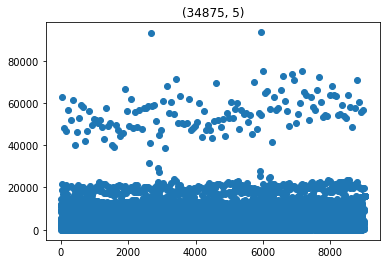

In [ ]:
for name, group in fsmerge.groupby(["Size", "Store"]):
    plt.title(name)
    plt.scatter(range(len(group)), group["Weekly_Sales"])
    plt.show()
    break

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


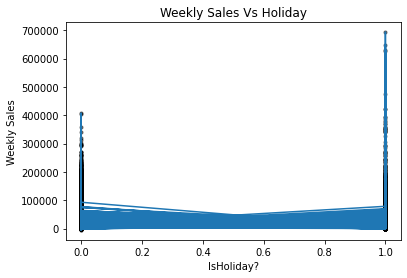

In [ ]:
x=fsmerge['IsHoliday'].values
y=fsmerge['Weekly_Sales'].values
plt.title('Weekly Sales Vs Holiday')
plt.scatter(x,y,s=np.pi*3,c=(0,0,0),alpha=0.5)
plt.xlabel('IsHoliday?')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

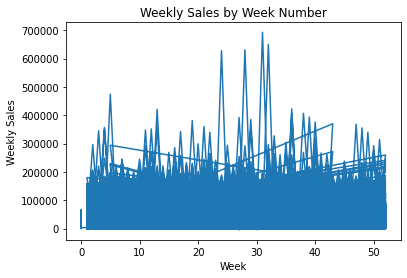

In [ ]:
x=fsmerge['Week']
y=fsmerge['Weekly_Sales']
plt.title('Weekly Sales by Week Number')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.plot(x,y)
plt.show()

In [ ]:
occurences = fsmerge['IsHoliday'].value_counts().to_frame().rename(index=str, columns={'IsHoliday': 'Occurences'})
occurences

,Occurences
False,393529
True,29796


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


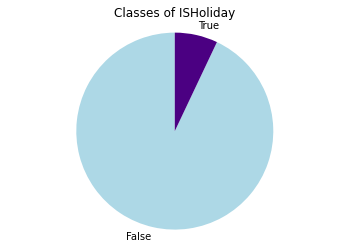

In [ ]:
colors=['lightblue','indigo',]
fig,ax=plt.subplots()
ax.pie(occurences,labels=['False','True'],startangle=90,colors=colors)
ax.axis('equal')
plt.title('Classes of ISHoliday')
plt.show()

In [ ]:
sizes=fsmerge.count()['Size'].round(1)
print(sizes)

423325


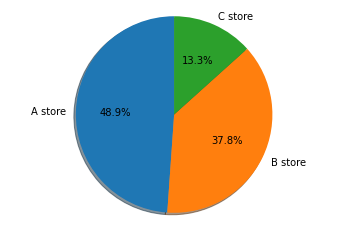

In [ ]:
labels = 'A store','B store','C store'
sizes = [(22/(45))*100,(17/(45))*100,(6/(45))*100]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

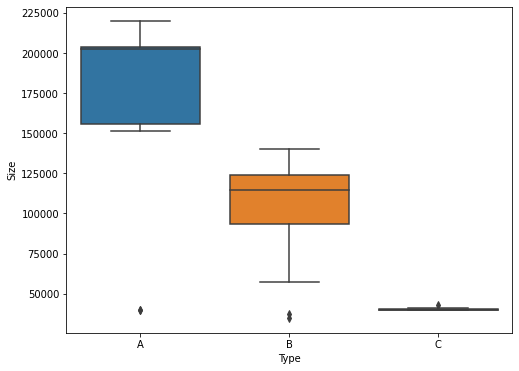

In [ ]:
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Size', data=store_type)

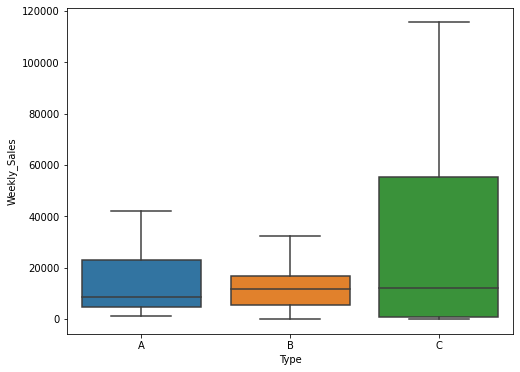

In [ ]:
store_sale = pd.concat([stores['Type'], fsmerge['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False)

In [ ]:
print('sales on non-holiday : ',fsmerge[fsmerge['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales on holiday : ',fsmerge[fsmerge['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales on non-holiday :  393529
sales on holiday :  29796


STEP 5: Data preprocessing

However Nan has been removed


In [ ]:
fsmerge.dtypes


Store             int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Size              int64
Dept            float64
Weekly_Sales    float64
Type_A            uint8
Type_B            uint8
Type_C            uint8
month             int64
Year              int64
Week              int64
dtype: object

In [ ]:
fsmerge.isnull().sum()

Store           0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Size            0
Dept            0
Weekly_Sales    0
Type_A          0
Type_B          0
Type_C          0
month           0
Year            0
Week            0
dtype: int64

In [ ]:
fsmerge.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,month,Year,Week
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,1.0,24924.50,1,0,0,2,2010,5
1,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,2.0,50605.27,1,0,0,2,2010,5
2,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,3.0,13740.12,1,0,0,2,2010,5
3,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,4.0,39954.04,1,0,0,2,2010,5
4,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,151315,5.0,32229.38,1,0,0,2,2010,5


In [ ]:
fsmerge['IsHoliday'] = fsmerge['IsHoliday'].astype(int)


In [ ]:
fsmerge[['Type_A','Type_B','Type_C']]=fsmerge[['Type_A','Type_B','Type_C']].astype(float)

In [ ]:
fsmerge.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,month,Year,Week
0,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,1.0,24924.50,1.0,0.0,0.0,2,2010,5
1,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,2.0,50605.27,1.0,0.0,0.0,2,2010,5
2,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,3.0,13740.12,1.0,0.0,0.0,2,2010,5
3,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,4.0,39954.04,1.0,0.0,0.0,2,2010,5
4,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,5.0,32229.38,1.0,0.0,0.0,2,2010,5


In [ ]:
fsmerge=fsmerge.astype(int)

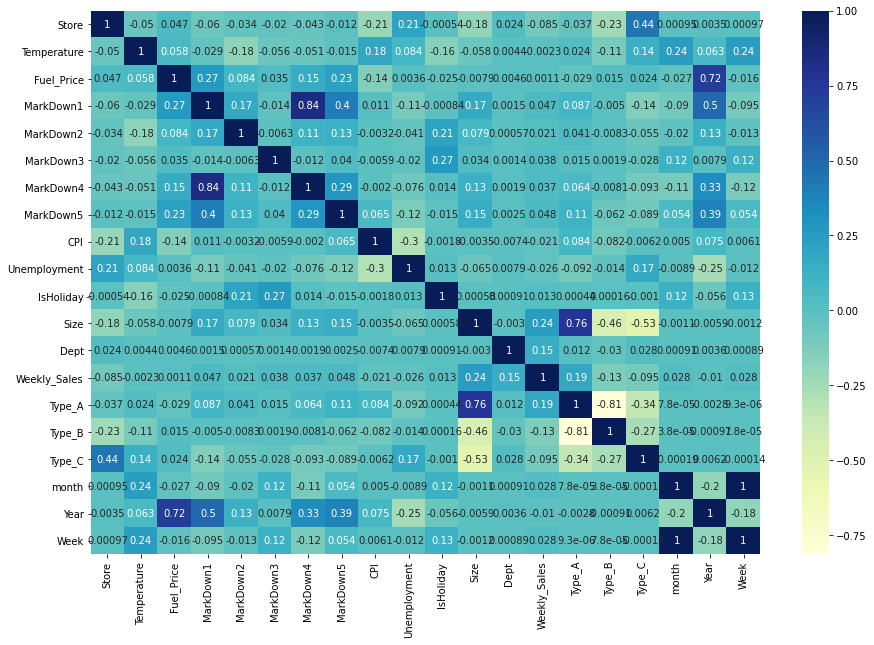

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(fsmerge.corr(),annot=True,cmap="YlGnBu")

To make this more accuracte we can reduce the markdown using PCA and the type using PCA

STEP: 6 Principal Component Analysis

In [ ]:
X=fsmerge.drop(['Weekly_Sales'],axis=1)
y=fsmerge['Weekly_Sales']

In [ ]:
#accuracy before pca
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)


In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print(" Train Accuracy", model.score(X_train,y_train))
print(" Test Accuracy", model.score(X_test,y_test))

 Train Accuracy 0.9951270154882724
 Test Accuracy 0.9635780103403797


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
le = LabelEncoder()

In [ ]:
trans=le.fit_transform(fsmerge['Weekly_Sales'])

In [ ]:
fsmerge['Weekly_Sales']=trans

In [ ]:
pca = PCA(n_components=3)


In [ ]:
markD=pca.fit_transform(fsmerge)

In [ ]:
markD.shape

(423325, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


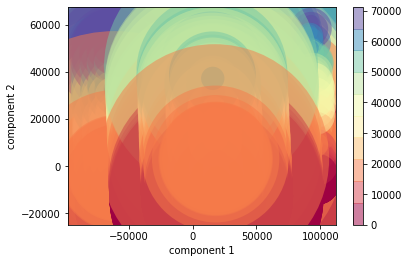

In [ ]:
plt.scatter(markD[:, 0],markD[:,1],markD[:,2], c=fsmerge['Weekly_Sales'],
             edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
fsmerge.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,month,Year,Week
0,1,42,2,0,0,0,0,0,211,8,0,151315,1,25011,1,0,0,2,2010,5
1,1,42,2,0,0,0,0,0,211,8,0,151315,2,46882,1,0,0,2,2010,5
2,1,42,2,0,0,0,0,0,211,8,0,151315,3,13922,1,0,0,2,2010,5
3,1,42,2,0,0,0,0,0,211,8,0,151315,4,38776,1,0,0,2,2010,5
4,1,42,2,0,0,0,0,0,211,8,0,151315,5,31920,1,0,0,2,2010,5


In [ ]:
fsmergepca=fsmerge
fsmergepca.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,month,Year,Week
0,1,42,2,0,0,0,0,0,211,8,0,151315,1,25011,1,0,0,2,2010,5
1,1,42,2,0,0,0,0,0,211,8,0,151315,2,46882,1,0,0,2,2010,5
2,1,42,2,0,0,0,0,0,211,8,0,151315,3,13922,1,0,0,2,2010,5
3,1,42,2,0,0,0,0,0,211,8,0,151315,4,38776,1,0,0,2,2010,5
4,1,42,2,0,0,0,0,0,211,8,0,151315,5,31920,1,0,0,2,2010,5


In [ ]:
fsmergepca=pd.DataFrame(markD)

In [ ]:
fsmergepca

,0,1,2
0,-15294.714929,9359.736230,-3661.909821
1,-16971.582071,31165.382048,-3754.693443
2,-14444.512389,-1696.127382,-3614.866801
3,-16350.088538,23083.604704,-3720.305242
4,-15824.433509,16248.091893,-3691.219939
...,...,...,...
423320,18227.455589,3096.022799,3316.488042
423321,18133.914301,3105.933525,8011.484207
423322,18264.757831,3090.331220,1543.184830
423323,18298.698243,3086.086949,191.991968


In [ ]:
pca.explained_variance_ratio_

array([0.90697745, 0.06235381, 0.01273033])

In [ ]:
fsmergepca.shape

(381077, 17)

The mean variance ratio is very low. So we dont use PCA for this process

In [ ]:
fsmerge['Type_C'].value_counts()

0    380494
1     42831
Name: Type_C, dtype: int64

In [ ]:
fsmergepca.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,month,Year,Week,type,mark
0,1,42.31,2.572,211.096358,8.106,0,151315,1.0,24924.50,2,2010,5,-0.623938,-3311.157204
1,1,42.31,2.572,211.096358,8.106,0,151315,2.0,50605.27,2,2010,5,-0.623938,-3311.157204
2,1,42.31,2.572,211.096358,8.106,0,151315,3.0,13740.12,2,2010,5,-0.623938,-3311.157204
3,1,42.31,2.572,211.096358,8.106,0,151315,4.0,39954.04,2,2010,5,-0.623938,-3311.157204
4,1,42.31,2.572,211.096358,8.106,0,151315,5.0,32229.38,2,2010,5,-0.623938,-3311.157204


In [ ]:
fsmergepca['type'].value_counts()

-0.623938    216334
 0.789394    164158
 0.125958     42831
-0.623938         1
-0.623938         1
Name: type, dtype: int64

Step 7: Feature Engineering

In [ ]:
treereg = DecisionTreeRegressor(max_depth=14, random_state=345)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=14,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=345, splitter='best')

In [ ]:

treereg.feature_importances_

array([0.07361399, 0.65503659, 0.00829171, 0.01491135, 0.19743214,
       0.00807761, 0.00147279, 0.00099132, 0.00225799, 0.00194342,
       0.0359711 ])

In [ ]:
pd.DataFrame({'feature':dataset.columns.difference(['weeklySales']), 'importance':treereg.feature_importances_})

,feature,importance
0,Dept,0.073614
1,MarkDown1,0.655037
2,MarkDown2,0.008292
3,MarkDown4,0.014911
4,MarkDown5,0.197432
5,Month,0.008078
6,Size,0.001473
7,Store,0.000991
8,Temperature,0.002258
9,Type,0.001943


In [ ]:
test=pd.read_csv('/content/test.csv')

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
test = test.merge(stores, how='left').merge(features, how='left')

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573
3,1,1,2012-11-23,True,A,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573
4,1,1,2012-11-30,False,A,151315,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573


In [ ]:
test = pd.get_dummies(test, columns=["Type"])
test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = test[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
test = test.fillna(0)
column_date = test['Date']

test['Month'] = pd.to_datetime(test['Date']).dt.month
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Week'] = pd.to_datetime(test['Date']).dt.week


In [ ]:
test['IsHoliday'] = test['IsHoliday'].astype(int)


test

,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C,Month,Year,Week
0,1,1,2012-11-02,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,1,0,0,11,2012,44
1,1,1,2012-11-09,0,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,1,0,0,11,2012,45
2,1,1,2012-11-16,0,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,1,0,0,11,2012,46
3,1,1,2012-11-23,1,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,0,0,11,2012,47
4,1,1,2012-11-30,0,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,1,0,0,11,2012,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,0,1,0,6,2013,26
115060,45,98,2013-07-05,0,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,0,1,0,7,2013,27
115061,45,98,2013-07-12,0,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,0,1,0,7,2013,28
115062,45,98,2013-07-19,0,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,0,1,0,7,2013,29


In [ ]:
export_graphviz(treereg, out_file='tree_vehicles.png', feature_names=dataset.columns.difference(['weeklySales']))

Step 8: Clusters Analysis

In [ ]:
sc = StandardScaler()
sc.fit(fsmerge)
df = sc.transform(fsmerge)

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

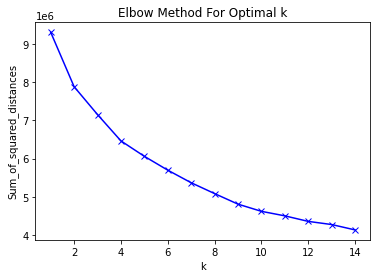

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
X=pd.DataFrame(fsmerge)

In [ ]:
X.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Size', 'Dept', 'Weekly_Sales', 'Type_A', 'Type_B',
       'Type_C', 'month', 'Year', 'Week', 'mark', 'type'],
      dtype='object')

In [ ]:
y=X['Weekly_Sales']

In [ ]:
X=X.drop(columns=['Weekly_Sales'])

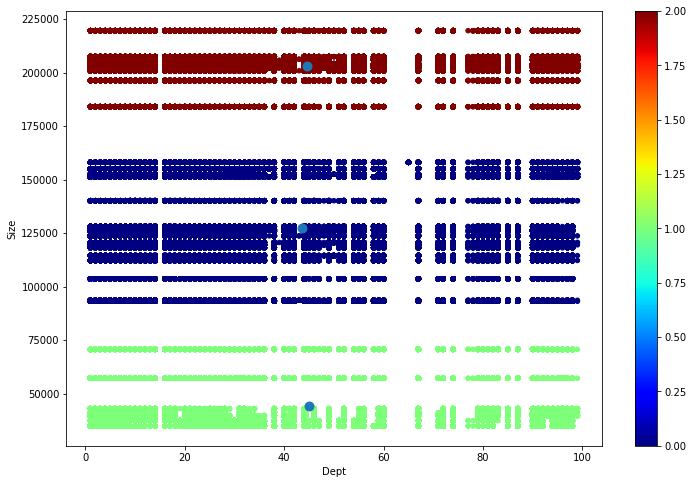

In [ ]:
kmeans = KMeans(n_clusters=3, init = 'random', max_iter = 1, random_state = 5).fit(X)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x = 'Dept', y = 'Size', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Dept', y = 'Size', ax = ax,  s = 80, mark_right=False)

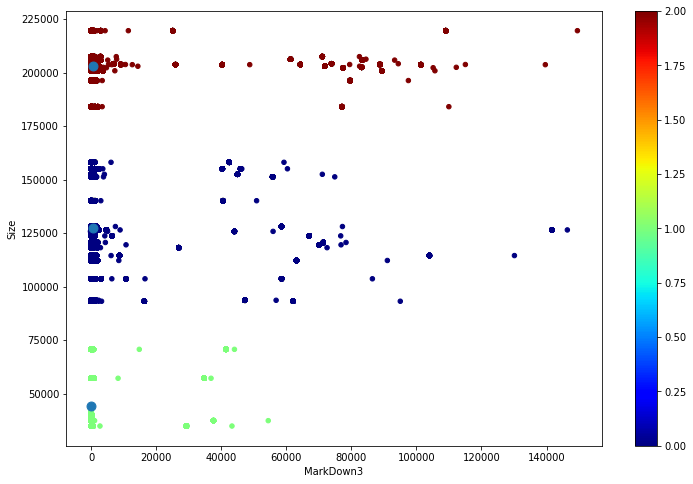

In [ ]:
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x = 'MarkDown3', y = 'Size', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'MarkDown3', y = 'Size', ax = ax,  s = 80, mark_right=False)

In [ ]:
X=fsmerge
X.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,month,Year,Week,mark,type
0,1,42,2,0,0,0,0,0,211,8,0,151315,1,24958,1,0,0,2,2010,5,-3454.822782,-0.61667
1,1,42,2,0,0,0,0,0,211,8,0,151315,2,46163,1,0,0,2,2010,5,-3454.822782,-0.61667
2,1,42,2,0,0,0,0,0,211,8,0,151315,3,13910,1,0,0,2,2010,5,-3454.822782,-0.61667
3,1,42,2,0,0,0,0,0,211,8,0,151315,4,38414,1,0,0,2,2010,5,-3454.822782,-0.61667
4,1,42,2,0,0,0,0,0,211,8,0,151315,5,31780,1,0,0,2,2010,5,-3454.822782,-0.61667


In [ ]:
X['IsHoliday']=X['IsHoliday'].astype(int)

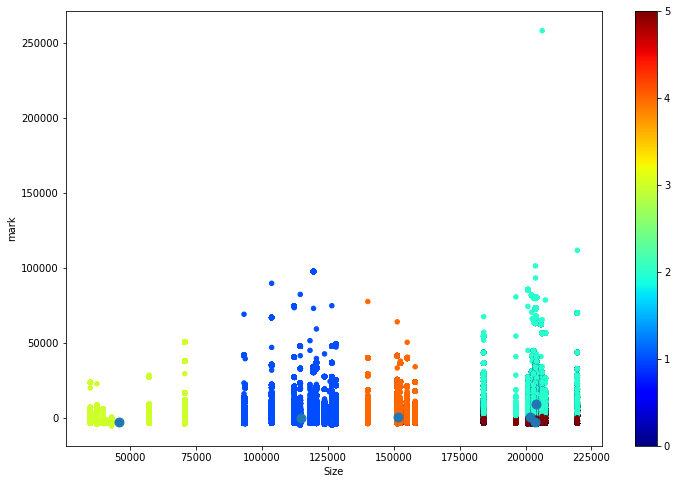

In [ ]:
kmeans = KMeans(n_clusters=6, init = 'random', max_iter = 1, random_state = 5).fit(X)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x = 'Size', y = 'mark', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Size', y = 'mark', ax = ax,  s = 80, mark_right=False)

In [ ]:
X=pd.DataFrame(fsmerge)

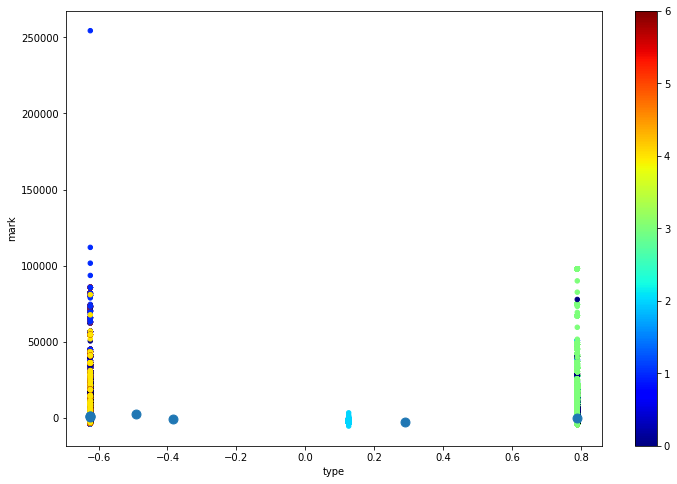

In [ ]:
kmeans = KMeans(n_clusters=7, init = 'random', max_iter = 1, random_state = 5).fit(X)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x = 'type', y = 'mark', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'type', y = 'mark', ax = ax,  s = 80, mark_right=False)

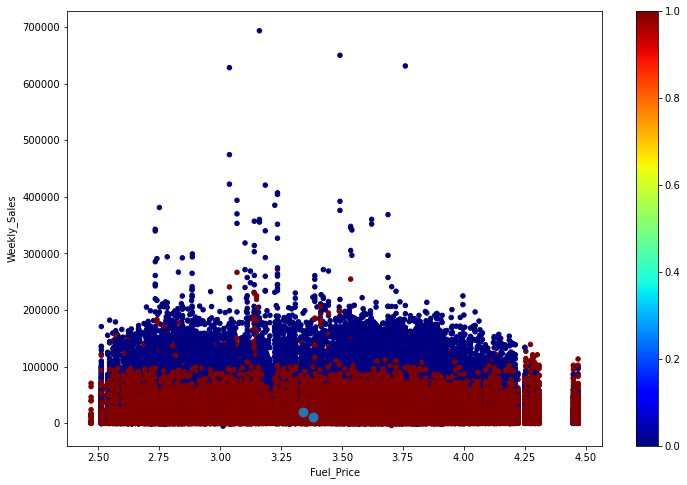

In [ ]:
kmeans = KMeans(n_clusters=2, init = 'random', max_iter = 1, random_state = 5).fit(X)
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns = list(X.columns.values))
fig, ax = plt.subplots(1, 1)
X.plot.scatter(x = 'Fuel_Price', y = 'Weekly_Sales', c= kmeans.labels_, figsize=(12,8), colormap='jet', ax=ax, mark_right=False)
centroids_df.plot.scatter(x = 'Fuel_Price', y = 'Weekly_Sales', ax = ax,  s = 80, mark_right=False)

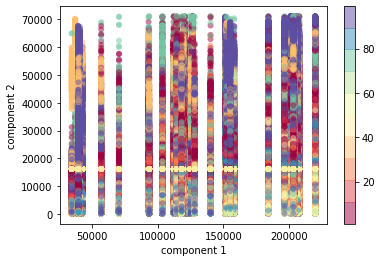

In [ ]:
plt.scatter(fsmerge['Size'],fsmerge['Weekly_Sales'], 
            c=fsmerge['Dept'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Step 9: Model Building

In [ ]:
lm=smf.ols('Weekly_Sales~Store+Dept+Temperature+Fuel_Price+CPI+Unemployment+Size+Year+month+Week+IsHoliday++Type_C', fsmerge).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     3542.
Date:                Sat, 25 Jul 2020   Prob (F-statistic):               0.00
Time:                        09:02:50   Log-Likelihood:            -4.6956e+06
No. Observations:              423325   AIC:                         9.391e+06
Df Residuals:                  423312   BIC:                         9.391e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.347e+05      1e+05      4.335   

In [ ]:
X=dataset.drop(columns=['weeklySales'])
y=dataset['weeklySales']
#,'mark','type'

In [ ]:
print(X)

        Store  Dept  isHoliday Type  ...  MarkDown2  MarkDown4  MarkDown5  Month
0           1     1          0    0  ...       0.00       0.00       0.00      2
1           1     1          1    0  ...       0.00       0.00       0.00      2
2           1     1          0    0  ...       0.00       0.00       0.00      2
3           1     1          0    0  ...       0.00       0.00       0.00      2
4           1     1          0    0  ...       0.00       0.00       0.00      3
...       ...   ...        ...  ...  ...        ...        ...        ...    ...
421565     45    98          0    1  ...      20.64    1601.01    3288.25      9
421566     45    98          0    1  ...       0.00    2253.43    2340.01     10
421567     45    98          0    1  ...       0.00     599.32    3990.54     10
421568     45    98          0    1  ...       0.00     437.73    1537.49     10
421569     45    98          0    1  ...      58.08     211.94     858.33     10

[421570 rows x 11 columns]


In [ ]:
dataset['Type'] = dataset['Type'].str.replace('A','0')
dataset['Type'] = dataset['Type'].str.replace('B','1')
dataset['Type'] = dataset['Type'].str.replace('C','2')
dataset['isHoliday'] = dataset['isHoliday'].astype(int)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.20, random_state=0)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Linear Regression

In [ ]:
model = LinearRegression().fit(X_train, y_train)

In [ ]:
accuracy4=model.score(X_train, y_train)

In [ ]:

y_pred = model.predict(X_test)

In [ ]:
print(accuracy4)
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.09210437565935192
12296.779325709611
15972.900772919114


KNN Regressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10,n_jobs=4)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

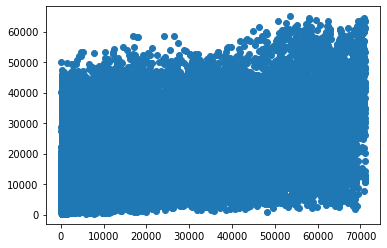

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
accuracy=knn.score(X_test,y_test)
print(knn.score(X_train,y_train))

0.4516311158664296


In [ ]:
print(accuracy)
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.32318987843986235
9681.999951573851
13784.399471714702


In [ ]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

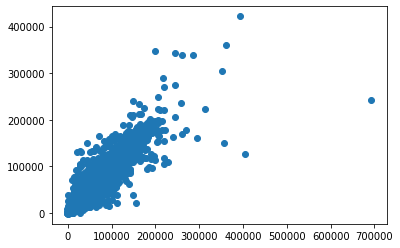

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
accuracy1=dt.score(X_test,y_test)
print(dt.score(X_train,y_train))

1.0


In [ ]:
print(accuracy1)

print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.9500756987730351
1892.541593220339
5104.518707810502


In [ ]:
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
accuracy2=rfr.score(X_test,y_test)
print(rfr.score(X_train,y_train))

In [ ]:
print(accuracy2)
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

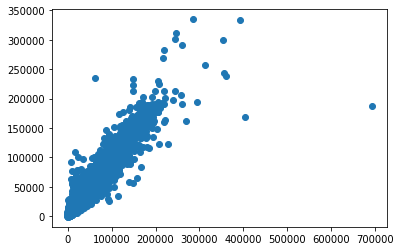

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
import pickle
pickle.dump(etr, open('modelE.pkl','wb'))

In [ ]:
accuracy3=etr.score(X_test,y_test)
print(etr.score(X_train,y_train))

0.9999999981917663


In [ ]:
print(accuracy3)
print(etr.score(X_train,y_train))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.9846109103880013
0.9999999981917663
1103.1245666253274
2078.5519924827486


In [ ]:
xgbr = xgb.XGBRegressor(verbosity=0)

In [ ]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [ ]:
score = xgbr.score(X_train, y_train)  
score

0.7618142316810201

In [ ]:
accuracy4=xgbr.score(X_test,y_test)

In [ ]:
print(accuracy4)
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.760768347433576
1103.1245666253274
2078.5519924827486


In [ ]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model","Accuracy", "MAE", "RMSE", ]
x.add_row(["Linear Regression (Baseline)", 0.09210437565935192 *100,
12296.779325709611,
15972.900772919114])
x.add_row(["KNNRegressor", 0.32318987843986235*100,
12296.779325709611,
15972.900772919114])
x.add_row(["DecisionTreeRegressor",0.9740009315637927*100,
1373.506702887852,
2701.6763535430528])
x.add_row(["RandomForestRegressor", 0.9728522514630202 *100,
1529.5007584732932,
2760.7134869720026])
x.add_row(["ExtraTreeRegressor", 0.9846175261448953*100,
1103.731239985039,
2078.105160563339])
x.add_row(["XGBRegressor", 0.760768347433576*100,
1103.731239985039,
2078.105160563339])
print(x)

+------------------------------+--------------------+--------------------+--------------------+
|            Model             |      Accuracy      |        MAE         |        RMSE        |
+------------------------------+--------------------+--------------------+--------------------+
| Linear Regression (Baseline) | 9.210437565935193  | 12296.779325709611 | 15972.900772919114 |
|         KNNRegressor         | 32.318987843986235 | 12296.779325709611 | 15972.900772919114 |
|    DecisionTreeRegressor     | 97.40009315637927  | 1373.506702887852  | 2701.6763535430528 |
|    RandomForestRegressor     | 97.28522514630203  | 1529.5007584732932 | 2760.7134869720026 |
|      ExtraTreeRegressor      | 98.46175261448953  | 1103.731239985039  | 2078.105160563339  |
|         XGBRegressor         | 76.07683474335761  | 1103.731239985039  | 2078.105160563339  |
+------------------------------+--------------------+--------------------+--------------------+


Based on the table I take in  Random forest, Extra Tree Regressor for the test.csv file.





In [ ]:
fsmerge.shape

(423325, 20)

In [ ]:
fsmerge.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Dept,Weekly_Sales,Type_A,Type_B,Type_C,month,Year,Week
0,1,42,2,0,0,0,0,0,211,8,0,151315,1,25011,1,0,0,2,2010,5
1,1,42,2,0,0,0,0,0,211,8,0,151315,2,46882,1,0,0,2,2010,5
2,1,42,2,0,0,0,0,0,211,8,0,151315,3,13922,1,0,0,2,2010,5
3,1,42,2,0,0,0,0,0,211,8,0,151315,4,38776,1,0,0,2,2010,5
4,1,42,2,0,0,0,0,0,211,8,0,151315,5,31920,1,0,0,2,2010,5


In [ ]:
test=pd.read_csv('/content/test.csv')

In [ ]:
test=test.drop(columns=['Date'])

In [ ]:
test.shape

(115064, 19)

In [ ]:
test.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C,Month,Year,Week
0,1,1,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,1,0,0,11,2012,44
1,1,1,0,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,1,0,0,11,2012,45
2,1,1,0,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,1,0,0,11,2012,46
3,1,1,1,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,0,0,11,2012,47
4,1,1,0,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,1,0,0,11,2012,48


In [ ]:
etr_pred=etr.predict(test)


In [ ]:

dt_pred = dt.predict(test)

In [ ]:
test['Weekly_SalesE']=etr_pred

test['Weekly_SalesD']=dt_pred

In [ ]:
test.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C,Month,Year,Week,Weekly_SalesE,Weekly_SalesD
0,1,1,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,1,0,0,11,2012,44,2050.831000,2140.0
1,1,1,0,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,1,0,0,11,2012,45,2050.831000,2140.0
2,1,1,0,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,1,0,0,11,2012,46,2050.831000,2140.0
3,1,1,1,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,0,0,11,2012,47,1449.837667,2140.0
4,1,1,0,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,1,0,0,11,2012,48,1627.831000,2140.0


In [ ]:
X.shape

(115064, 19)

In [ ]:
X_train.shape

(57532, 19)

In [ ]:
X=test.drop(columns=['Weekly_SalesE','Weekly_SalesR','Weekly_SalesD'])


In [ ]:
print(etr.score(X,test['Weekly_SalesE']))


1.0


In [ ]:
print(rfr.score(X,rfr_pred))
print(dt.score(X,dt_pred))

1.0
1.0


In [ ]:
print(test)

        Store  Dept  IsHoliday  ...  Weekly_SalesE  Weekly_SalesR  Weekly_SalesD
0           1     1          0  ...    1674.800000      2492.0650         1077.0
1           1     1          0  ...    1674.800000      2492.0650         1077.0
2           1     1          0  ...    1674.800000      2492.0650         1077.0
3           1     1          1  ...    1674.800000      2492.0650         1077.0
4           1     1          0  ...    1557.066667      2355.1075         1132.0
...       ...   ...        ...  ...            ...            ...            ...
115059     45    98          0  ...   15364.533333     16160.0000        16160.0
115060     45    98          0  ...   15364.533333     16160.0000        16160.0
115061     45    98          0  ...   15364.533333     16160.0000        16160.0
115062     45    98          0  ...   15364.533333     16160.0000        16160.0
115063     45    98          0  ...   15364.533333     16160.0000        16160.0

[115064 rows x 22 columns]


Step 11: Model Optimization

GRid search for random forest

In [ ]:
param_grid={'max_depth': range(8,15),
            'n_estimators': (10, 50)}

In [ ]:
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(X_train, y_train)

In [ ]:
grid_result.best_score_

0.9649891649199113

In [ ]:

grid_result.best_params_

{'max_depth': 14, 'n_estimators': 50}

In [ ]:
rfr = RandomForestRegressor(n_estimators = 50,max_depth=14,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [ ]:
X.shape

(421570, 11)

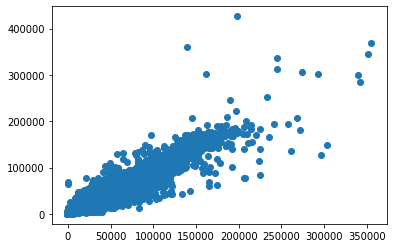

In [ ]:
plt.scatter(y_test,y_pred)
plt.show()

In [ ]:
accuracy21=rfr.score(X_test,y_test)
print(rfr.score(X_train,y_train))

0.9617481972700821


In [ ]:
dataset_test.head()

,Store,Dept,isHoliday,Type,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Month
0,1,1,False,A,151315,55.32,6766.44,5147.70,3639.90,2737.42,11
1,1,1,False,A,151315,61.24,11421.32,3370.89,4646.79,6154.16,11
2,1,1,False,A,151315,52.92,9696.28,292.10,1133.15,6612.69,11
3,1,1,True,A,151315,56.23,883.59,4.17,209.91,303.32,11
4,1,1,False,A,151315,52.34,2460.03,0.00,150.57,6966.34,11


In [ ]:
rfr_pred=rfr.predict(dataset_test)

In [ ]:
test['Weekly_SalesR']=rfr_pred

In [ ]:
test.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type_A,Type_B,Type_C,Month,Year,Week,Weekly_SalesR
0,1,1,0,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,1,0,0,11,2012,44,2474.14
1,1,1,0,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,1,0,0,11,2012,45,2474.14
2,1,1,0,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,1,0,0,11,2012,46,2474.14
3,1,1,1,151315,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,0,0,11,2012,47,2474.14
4,1,1,0,151315,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,1,0,0,11,2012,48,2411.14


In [ ]:
accuracy21

0.9655866835793554

In [ ]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1749.7718056414665
3108.2625217402697


In [ ]:
gsc = GridSearchCV(estimator=ExtraTreesRegressor(),param_grid=param_grid, verbose=0, n_jobs=-1)
    
grid_result = gsc.fit(X_train, y_train)

In [ ]:
grid_result.best_score_

0.9440705126491359

In [ ]:
grid_result.best_params_

{'max_depth': 14, 'n_estimators': 50}

In [ ]:
etr = ExtraTreesRegressor(n_estimators=50,n_jobs=4,max_depth=14) 
etr.fit(X_train,y_train)a
y_pred=etr.predict(X_test)

In [ ]:
print(etr.score(X_test,y_test))
print(metrics.mean_absolute_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.9432173535683076
2517.179194264177
3992.6592087510962


In [ ]:
import pickle
pickle.dump(rfr, open('modelE.pkl','wb'))

In [ ]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[1,	1,	0,	151315,	55.32,	3.386,	6766.44,	5147.70,	50.82,	3639.90,	2737.42,	223.462779,	6.573,	1,	0,	0,	11,	2012,	44]])

array([2474.14])

In [ ]:
test1=pd.read_csv('/content/test.csv')

In [ ]:
test1['Date'] = column_date
test['id'] = test['Store'].astype(str) + '_' +  test['Dept'].astype(str) + '_' +  test1['Date'].astype(str)
test2 = test[['id', 'Weekly_SalesD']]
test2 = test2.rename(columns={'id': 'Id', 'Weekly_SalesE': 'Weekly_Sales'})

In [ ]:
test2.to_csv('outputD.csv', index=False)

In [ ]:
test2.head()

NameError: ignored